In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math
import random

dataDir = 'c:/Users/llave/Documents/CMS/data/electron_selection_failSelection_compressed/'

In [2]:
electronsTotal = np.load("electronsTotal.npy")
electronsFailedEReco = np.load("electronsFailedEReco.npy")

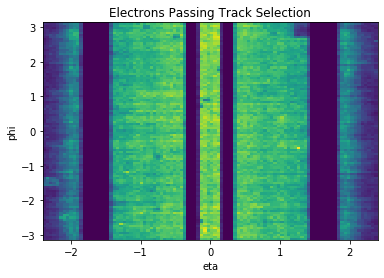

In [3]:
total_etas = electronsTotal[:,0]
total_phis = electronsTotal[:,1]
plt.title("Electrons Passing Track Selection")
plt.xlabel("eta")
plt.ylabel("phi")
hist, xbins, ybins, im = plt.hist2d(total_etas, total_phis, bins=100)

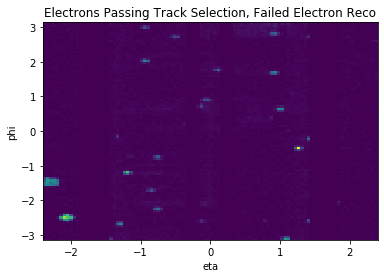

In [4]:
failEReco_etas = electronsFailedEReco[:,0]
failEReco_phis = electronsFailedEReco[:,1]
plt.title("Electrons Passing Track Selection, Failed Electron Reco")
plt.xlabel("eta")
plt.ylabel("phi")
hist2, xbins, ybins, im = plt.hist2d(failEReco_etas, failEReco_phis, bins=100)

30529.0 2505178.0


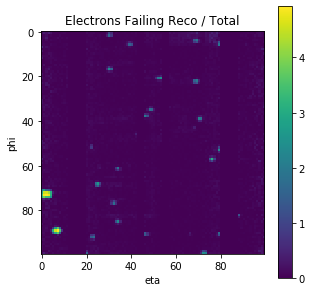

In [5]:
ratio_hist = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if(not(hist[i,j] == 0)): ratio_hist[i,j] = 1.0*hist2[i,j]/(hist[i,j]*0.2)
        else: ratio_hist[i,j] = 0
plt.figure(figsize=(5,5))
plt.title("Electrons Failing Reco / Total")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(np.rot90(ratio_hist))
plt.colorbar()
print(np.sum(hist2),np.sum(hist))

In [24]:
resultsDir = "c:/Users/llave/Desktop/failSelection_p0/"
indices = np.load(resultsDir+"outputFiles/falseEventsB.npy",allow_pickle=True)
indices = np.reshape(indices,(int(indices.shape[0]/4),4))
print(indices.shape)
false_indices = np.array([x for x in indices if x[3]>0.5])
true_indices = np.array([x for x in indices if x[3]<0.5])
print(true_indices.shape, false_indices.shape)

(312575, 4)
(304748, 4) (7827, 4)


In [26]:
etas, phis = [],[]
muonRecos, tauRecos = [],[]
for event in false_indices:
    fileNum = int(event[0])
    eventNum = int(event[1])
    label = event[2]
    pred = event[3]
            
    infos = np.load(dataDir+'bkg_0p25_{0}.npz'.format(str(fileNum)))['infos']
    for info in infos:
        if(int(info[1]) == eventNum):
            etas.append(info[7])
            phis.append(info[8])
            muonRecos.append(info[5])
            tauRecos.append(info[6])

7827.0


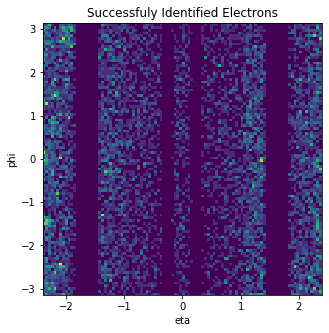

In [27]:
plt.figure(figsize=(5,5))
plt.title("Successfuly Identified Electrons")
plt.xlabel("eta")
plt.ylabel("phi")
hist3,_,_,_ = plt.hist2d(etas,phis,bins=100)
print(np.sum(hist3))

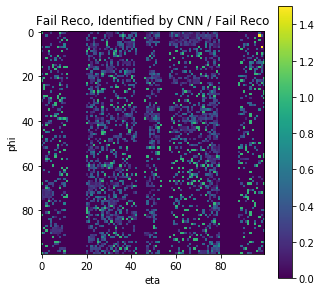

In [22]:
ratio_hist_2 = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if(not(hist2[i,j] == 0)): ratio_hist_2[i,j] = 1.0*hist3[i,j]/hist2[i,j]
        else: ratio_hist_2[i,j] = 0
plt.figure(figsize=(5,5))
plt.title("Fail Reco, Identified by CNN / Fail Reco")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(np.rot90(ratio_hist_2))
plt.colorbar()

In [10]:
nPassTauReco = len([x for x in tauRecos if math.fabs(x)<0.15])
nPassMuonReco = len([x for x in muonRecos if math.fabs(x)<0.15])
print(nPassTauReco,nPassTauReco*1.0/len(false_indices))
print(nPassMuonReco,nPassMuonReco*1.0/len(false_indices))

663 9.895522388059701
202 3.014925373134328


(array([197., 205., 198., 198., 176., 140., 168., 147., 155., 140., 111.,
         45.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  87., 148.,
        130., 125., 146., 123., 105., 110., 119., 101.,  79.,  73.,  73.,
         71.,  76.,  69.,  84.,  78.,  56.,  63.,  55.,  45.,  38.,   0.,
          0.,   0.,   7.,  56.,  72.,  63.,  79.,  50.,  53.,   5.,   0.,
          0.,   0.,  36.,  40.,  64.,  42.,  60.,  41.,  60.,  60.,  82.,
         66.,  75.,  61.,  74.,  70.,  75., 110., 146., 149., 128., 147.,
        137., 174.,  81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         49.,  87., 116., 104., 140., 112., 129., 143., 136., 159., 197.,
        158.]),
 array([-2.39960312e+00, -2.35161250e+00, -2.30362187e+00, -2.25563125e+00,
        -2.20764062e+00, -2.15965000e+00, -2.11165938e+00, -2.06366875e+00,
        -2.01567813e+00, -1.96768750e+00, -1.91969688e+00, -1.87170625e+00,
        -1.82371563e+00, -1.77572500e+00, -1.72773438e+00, -1.67974376e+00,
        -1.631

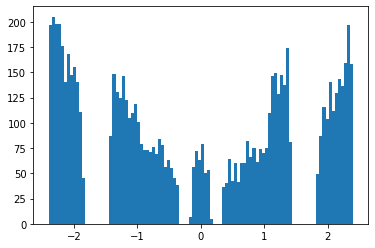

In [28]:
plt.hist(etas,bins=100)

(array([105.,  71.,  74.,  76.,  81.,  66.,  84.,  85.,  83.,  85.,  89.,
         87.,  68.,  70.,  72.,  71.,  54.,  64.,  69.,  77.,  74.,  83.,
         70.,  81.,  75.,  69.,  75.,  81.,  79.,  80.,  66.,  75.,  62.,
         71.,  70.,  76.,  65.,  77.,  76.,  63.,  80.,  69.,  72.,  90.,
         78.,  96.,  93.,  75.,  91., 107.,  95.,  68.,  72.,  66.,  76.,
         84.,  88.,  64.,  83.,  98.,  68.,  87.,  83.,  97.,  88.,  84.,
         81.,  81.,  73.,  69.,  75.,  86.,  76.,  84.,  91.,  81.,  80.,
         61.,  78.,  96.,  82.,  76.,  74.,  69.,  66.,  73.,  69.,  82.,
         81.,  69.,  70.,  80.,  78.,  95.,  90.,  93.,  65.,  87.,  89.,
         76.]),
 array([-3.14132047e+00, -3.07850252e+00, -3.01568457e+00, -2.95286661e+00,
        -2.89004866e+00, -2.82723071e+00, -2.76441276e+00, -2.70159481e+00,
        -2.63877686e+00, -2.57595891e+00, -2.51314096e+00, -2.45032301e+00,
        -2.38750506e+00, -2.32468711e+00, -2.26186915e+00, -2.19905120e+00,
        -2.136

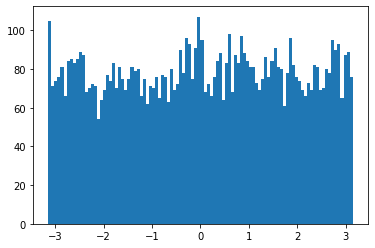

In [29]:
plt.hist(phis,bins=100)